# k-means 알고리즘으로 붓꽃 품종 구분하기

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
import pandas as pd

In [3]:
from sklearn.cluster import KMeans
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_lenth', 'sepal_width',
                                                'petal_lenth', 'petal_width'])
iris_df.head(3)

,sepal_lenth,sepal_width,petal_lenth,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(iris_df)

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [5]:
KM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [6]:
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_df.groupby(['target', 'cluster'])['sepal_lenth'].count()

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_lenth, dtype: int64

# silhouette 계수 측정

In [7]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
score_samples

array([ 0.85258191,  0.8149163 ,  0.82879659,  0.80435199,  0.84891774,
        0.7477614 ,  0.82109757,  0.8534934 ,  0.75127806,  0.82475199,
        0.80269525,  0.83540396,  0.80996716,  0.74535637,  0.70224038,
        0.64338856,  0.77526857,  0.85063272,  0.70636742,  0.81987458,
        0.78364122,  0.82546665,  0.79244412,  0.79345251,  0.77426479,
        0.79799564,  0.83296108,  0.84162136,  0.84325046,  0.81723402,
        0.8145665 ,  0.79849826,  0.76227879,  0.72184605,  0.82822866,
        0.83179477,  0.79374024,  0.84148042,  0.76779363,  0.84992603,
        0.84902387,  0.63767419,  0.78589195,  0.79963167,  0.74629437,
        0.80915172,  0.81295565,  0.81844011,  0.81783314,  0.85168255,
       -0.02672203,  0.36827154,  0.08489767,  0.59610609,  0.35669884,
        0.59416206,  0.27019063,  0.27245453,  0.32755642,  0.58167084,
        0.38107057,  0.58665651,  0.55085685,  0.47851679,  0.56757079,
        0.30479553,  0.5596951 ,  0.61137194,  0.46029717,  0.61

In [8]:
iris_df['silhouette_coeff'] = score_samples
iris_df.head()

,sepal_lenth,sepal_width,petal_lenth,petal_width,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852582
1,4.9,3.0,1.4,0.2,0,1,0.814916
2,4.7,3.2,1.3,0.2,0,1,0.828797
3,4.6,3.1,1.5,0.2,0,1,0.804352
4,5.0,3.6,1.4,0.2,0,1,0.848918


In [9]:
silhouette_score(iris.data, iris_df['cluster'])

np.float64(0.5511916046195918)

# 실루엣 차트

In [10]:
import matplotlib.pyplot as plt

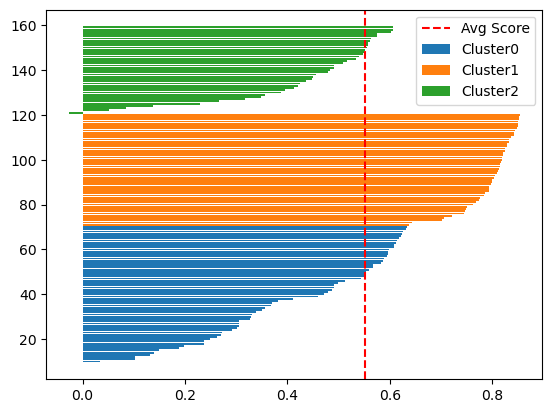

In [11]:
y_lower = 10

for i in range(3):
    cluster_i = score_samples[iris_df['cluster'] == i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower, y_upper), cluster_i, label=f'Cluster{i}')
    y_lower = y_upper
avg_score = silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score, color='red', linestyle='--', label='Avg Score')
plt.legend()
plt.show()
    

In [12]:
import numpy as np

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


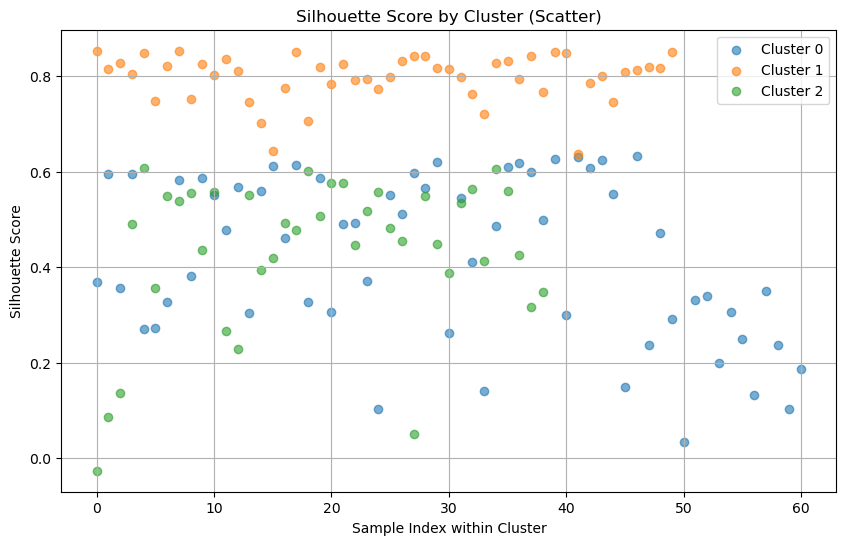

In [13]:
# 데이터 불러오기 및 클러스터링
iris = load_iris()
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(iris.data)

# 실루엣 점수 계산
score_samples = silhouette_samples(iris.data, labels)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['cluster'] = labels
iris_df['silhouette'] = score_samples

# 스캐터 차트
plt.figure(figsize=(10, 6))
for i in range(3):
    cluster_i = iris_df[iris_df['cluster'] == i]
    x_vals = np.arange(len(cluster_i))  # 각 샘플에 대한 고유한 x 좌표
    y_vals = cluster_i['silhouette'].values
    plt.scatter(x_vals, y_vals, label=f'Cluster {i}', alpha=0.6)


plt.title('Silhouette Score by Cluster (Scatter)')
plt.xlabel('Sample Index within Cluster')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# scree plot

In [14]:
KM.inertia_

78.85566582597731

In [15]:


# 컬럼명 줄여서 지정
iris_df = pd.DataFrame(iris.data, columns=['sepal_lenth', 'sepal_width', 'petal_lenth', 'petal_width'])

# 필요한 컬럼만 선택
scree_df = iris_df[['sepal_lenth', 'sepal_width', 'petal_lenth', 'petal_width']]


c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.p

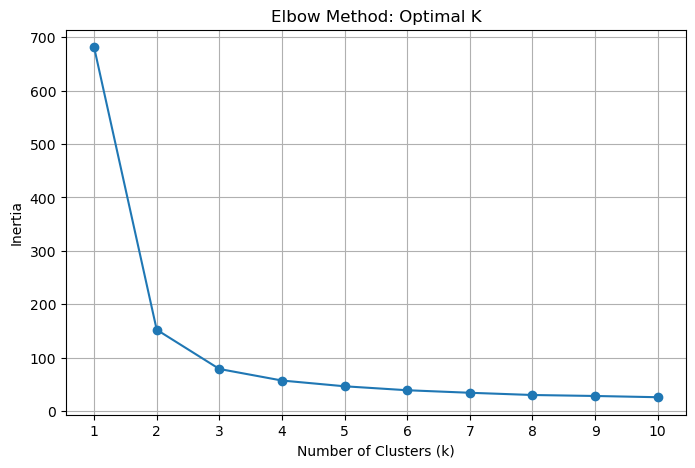

In [16]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method: Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# PCA > 2개의 주성분으로 축소

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed.shape

(150, 2)

In [18]:
# PCA 적용 대상 feature들만 선택
features = iris_df[['sepal_lenth', 'sepal_width', 'petal_lenth', 'petal_width']]

# PCA 모델 생성 및 2차원으로 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# 결과를 데이터프레임에 붙이기
iris_df['pca_x'] = pca_result[:, 0]
iris_df['pca_y'] = pca_result[:, 1]

In [19]:
# 컬럼명 중 튜플 타입인 것만 제거
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(iris_df[['sepal_lenth', 'sepal_width', 'petal_lenth', 'petal_width']])



c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
iris_df.columns = [col[0] if isinstance(col, tuple) else col for col in iris_df.columns]


In [21]:
print(iris_df.columns)


Index(['sepal_lenth', 'sepal_width', 'petal_lenth', 'petal_width', 'pca_x',
       'pca_y', 'cluster'],
      dtype='object')


In [22]:
iris_df.head()

,sepal_lenth,sepal_width,petal_lenth,petal_width,pca_x,pca_y,cluster
0,5.1,3.5,1.4,0.2,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,-2.728717,0.326755,1


# PCA 결과 시각화

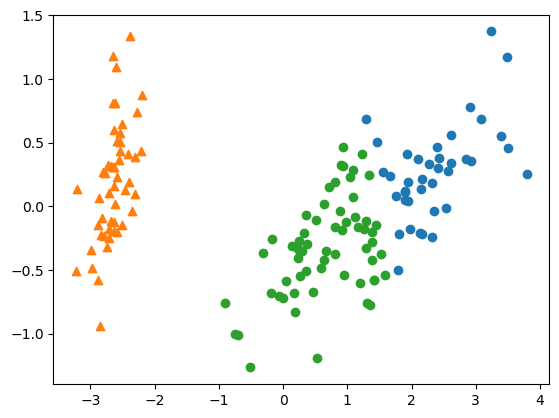

In [23]:
plt.scatter(x=iris_df.loc[iris_df['cluster'] == 0, 'pca_x'],
            y=iris_df.loc[iris_df['cluster'] == 0, 'pca_y'], marker='o')

plt.scatter(x=iris_df.loc[iris_df['cluster'] == 1, 'pca_x'],
            y=iris_df.loc[iris_df['cluster'] == 1, 'pca_y'], marker='^')

plt.scatter(x=iris_df.loc[iris_df['cluster'] == 2, 'pca_x'],
            y=iris_df.loc[iris_df['cluster'] == 2, 'pca_y'], marker='o')

plt.show()

# StandardScaler 로 스케일링
# PCA 2개로 축소
# 시각화

In [24]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [28]:
from sklearn.preprocessing import StandardScaler

features = iris_df[['sepal_lenth', 'sepal_width', 'petal_lenth', 'petal_width']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(scaled_features)

iris_df['pca_x'] = pca_scaled[:, 0]
iris_df['pca_y'] = pca_scaled[:, 1]

In [46]:
pca_scaled.explained_variance_ratio_

array([0.44272026, 0.18971182])

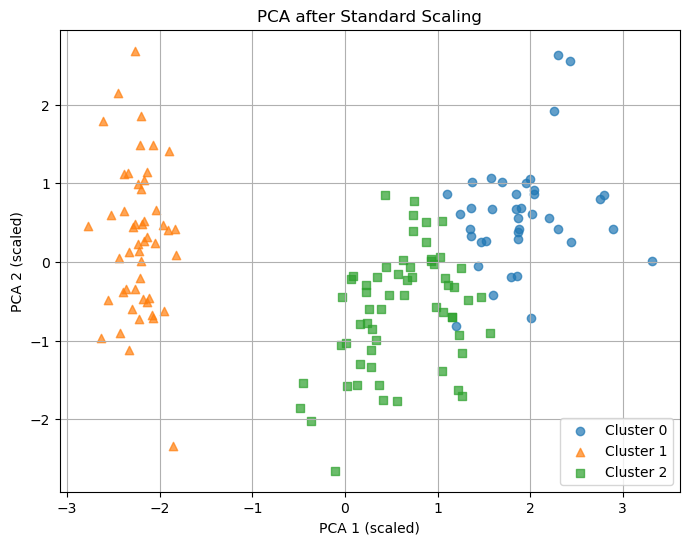

In [47]:
plt.figure(figsize=(8,6))

markers = ['o', '^', 's']
for i in range(3):
    subset = iris_df[iris_df['cluster'] == i]
    plt.scatter(subset['pca_x'], subset['pca_y'], label=f'Cluster {i}', marker=markers[i], alpha=0.7)

plt.xlabel('PCA 1 (scaled)')
plt.ylabel('PCA 2 (scaled)')
plt.title('PCA after Standard Scaling')
plt.legend()
plt.grid(True)
plt.show()

# 클러스터링 실습

In [37]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

# PCA 2개의 주성분으로 만든 후 스케일링 전후 비교

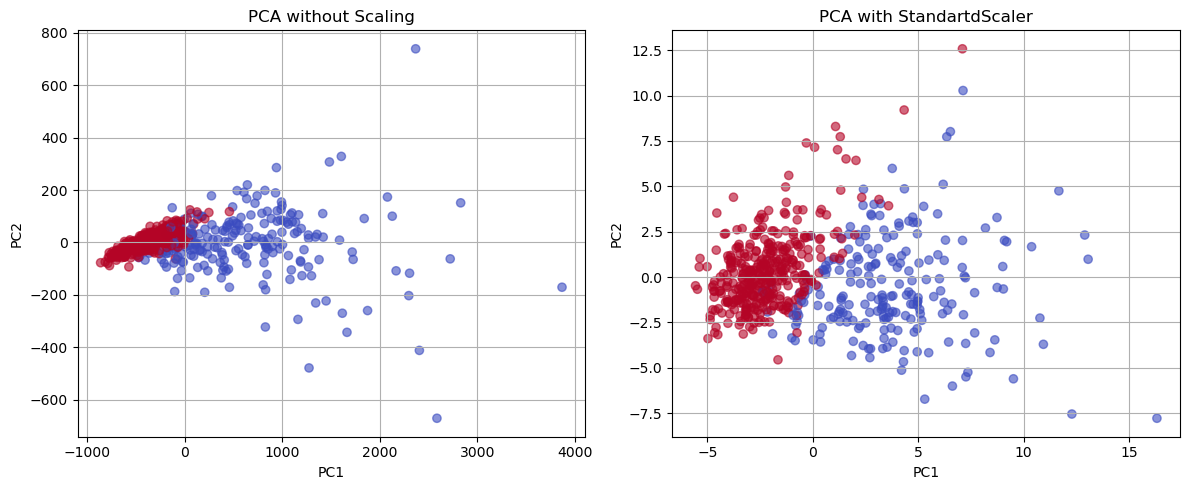

In [41]:
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
features = cancer.feature_names

# 스케일링 없이
pca_raw = PCA(n_components=2)
pca_raw_x = pca_raw.fit_transform(x)

# 스케일링 적용
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

pca_scaled = PCA(n_components=2)
pca_scaled_x = pca_scaled.fit_transform(scaled_x)

plt.figure(figsize=(12,5))

# 스케일링 없이
plt.subplot(1, 2, 1)
plt.scatter(pca_raw_x[:,0], pca_raw_x[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('PCA without Scaling')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# 스케일링 적용
plt.subplot(1, 2, 2)
plt.scatter(pca_scaled_x[:,0], pca_scaled_x[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('PCA with StandartdScaler')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

plt.tight_layout()
plt.show()

In [42]:
pca_raw.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [44]:
pca_scaled.explained_variance_ratio_

array([0.44272026, 0.18971182])

# PCA 2개의 주성분, 그 이상 주성분 추출
# explained_variance_ratio_ 이 가장 높은 주성문의 갯수
# kmeans data=pca=1, pca=2, cluster=2

In [49]:
pca_10 = PCA(n_components=10)
pca_10.fit(scaled_x)
print(np.round(pca_10.explained_variance_ratio_, 10))
print(np.round(np.cumsum(pca_10.explained_variance_ratio_), 10))

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881]


In [50]:
pca_scaled_10 = pca_10.transform(scaled_x)
pca_scaled_10.shape

(569, 10)

In [58]:
df_2 = pd.DataFrame(pca_scaled_10, columns=['ftr1', 'ftr2',
                                      'ftr3', 'ftr4',
                                      'ftr5', 'ftr6',
                                      'ftr7', 'ftr8', 'ftr9', 'ftr10'])
df_2

,ftr1,ftr2,ftr3,ftr4,ftr5,ftr6,ftr7,ftr8,ftr9,ftr10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877401
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106994
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116976
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263806,0.377705
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256988
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108633
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520876
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089295


In [59]:
# 2. PCA 10차원 축소
pca = PCA(n_components=10)
X_pca_10 = pca.fit_transform(X_scaled)
df_2 = pd.DataFrame(X_pca_10, columns=[f'ftr{i}' for i in range(1, 11)])

# 3. KMeans 클러스터링
kmeans = KMeans(n_clusters=2, random_state=42)
df_2['cluster'] = kmeans.fit_predict(df_2)

# 4. Silhouette Score 계산
score = silhouette_score(df_2.drop('cluster', axis=1), df_2['cluster'])
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.3577


c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
